In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks for Inverse Problems

In [2]:
import matplotlib.pyplot as plt

from pinn import Pinns

## Set up

In [3]:
kwargs = {
    "alpha_f" : 0.005,
    "h_f" : 5,
    "T_hot" : 4,
    "T0" : 1,
    "T_cold" : 1,
}

t0 = 0
tf = 8
n_int = 128*tf
n_sb = 64*tf
n_tb = 64

pinn = Pinns(n_int, n_sb, n_tb, t0, tf, **kwargs)

Charging
Idle
Discharging
Idle
Charging
Idle
Discharging
Idle


In [4]:
# Plot the input training points

input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()
input_meas_, output_meas_ = pinn.get_measurement_data()

Charging
Idle
Discharging
Idle
Charging
Idle
Discharging
Idle


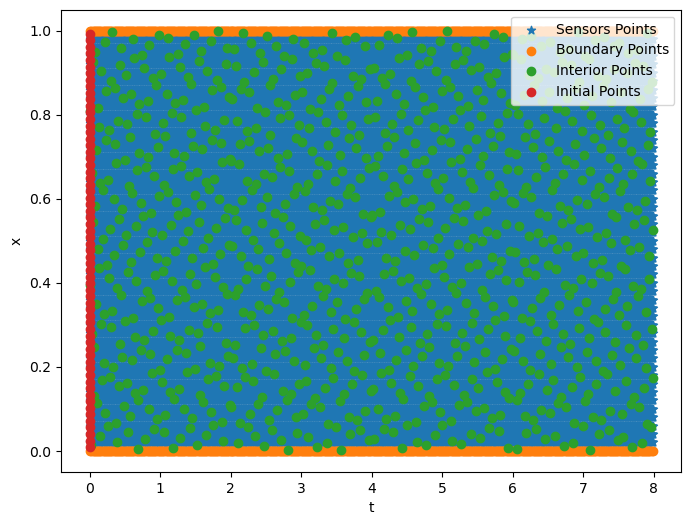

In [5]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(
    input_meas_[:, 0].detach().numpy(),
    input_meas_[:, 1].detach().numpy(), 
    label="Sensors Points", marker="*")
plt.scatter(
    input_sb_[:, 0].detach().numpy(),
    input_sb_[:, 1].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_int_[:, 0].detach().numpy(),
    input_int_[:, 1].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_tb_[:, 0].detach().numpy(),
    input_tb_[:, 1].detach().numpy(),
    label="Initial Points")

plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

## Training

In [8]:
%%time

hist = pinn.fit(num_epochs=2, max_iter=10000, verbose=True)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
################################  0  ################################
Total loss:  1.7323 | PDE Loss:  -1.9981 | Function Loss:  0.7323
Total loss:  1.7223 | PDE Loss:  -2.505 | Function Loss:  0.7223
Total loss:  1.6418 | PDE Loss:  0.0299 | Function Loss:  0.6311
Total loss:  1.5198 | PDE Loss:  0.7468 | Function Loss:  0.4396
Total loss:  1.453 | PDE Loss:  0.8586 | Function Loss:  0.3255
Total loss:  1.334 | PDE Loss:  0.77 | Function Loss:  0.1955
Total loss:  1.219 | PDE Loss:  -0.098 | Function Loss:  0.1975
Total loss:  1.1923 | PDE Loss:  -0.222 | Function Loss:  0.1752
Total loss:  1.173 | PDE Loss:  -0.3711 | Function Loss:  0.1605
Total loss:  1.1626 | PDE Loss:  -0.526 | Function Loss:  0.1536
Total loss:  1.1552 | PDE Loss:  -0.7194 | Function Loss:  0.1494
Total loss:  1.1493 | PDE Loss:  -0.984 | Function Loss:  0.1461
Total loss:  1.145 | PDE Loss:  -1.3023 | Function Loss:  0.1435
Total loss:  1.142 | PDE 

## Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


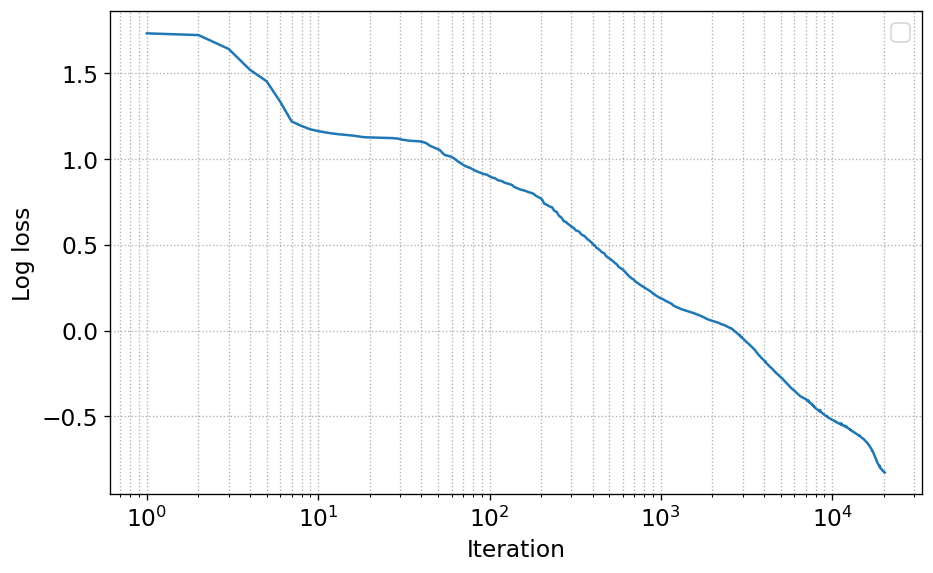

In [39]:
fig_loss = pinn.plot_loss_function(hist)

In [40]:
fig_loss.savefig('loss.pdf')

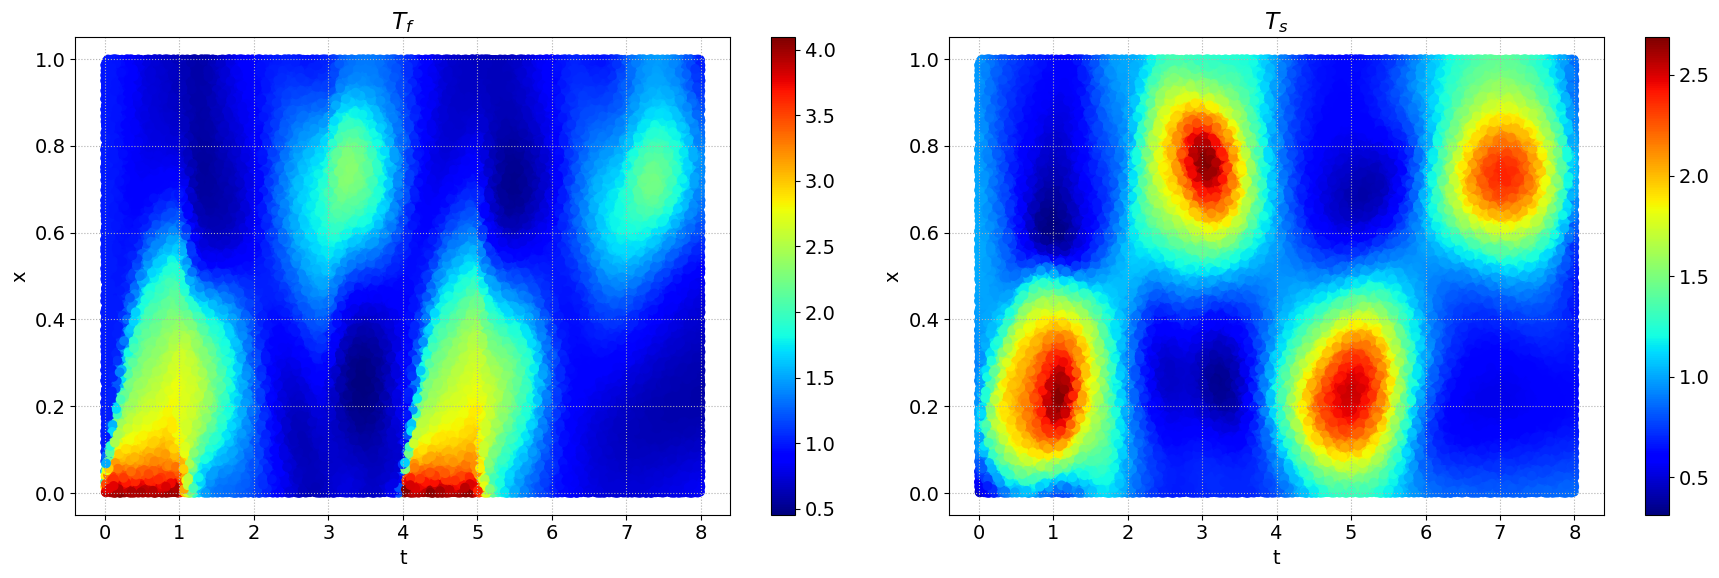

In [28]:
inputs, outputs = pinn.approximate_random()
fig = pinn.plot(inputs, outputs)

In [13]:
fig.savefig('output_random.png')

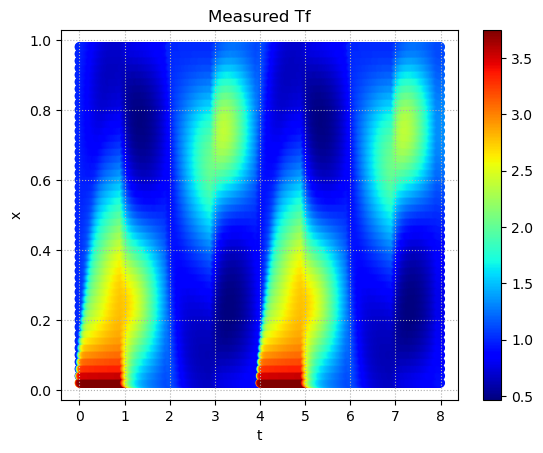

In [22]:
pinn.plot_reference()

In [14]:
import numpy as np
import torch
def convert_df_to_tensor(df):
    """Function to convert a pandas dataframe to a PyTorch tensor"""
    a = np.vstack(df.values).astype(np.float32)
    return torch.from_numpy(a)

In [ ]:
# import torch
# torch.save(pinn.approximate_solution.state_dict(), f'saved_models/pinn_complete.pth')


In [29]:
# Read measurements from data file and return approx solution
import pandas as pd
data = pd.read_csv('SubExample.csv', header=0).drop(columns=['ts'])
inputs = convert_df_to_tensor(data)
output_tf = pinn.approximate_solution(inputs)
output_ts = pinn.approximate_coefficient(inputs)
outputs = torch.cat([output_tf, output_ts], 1)

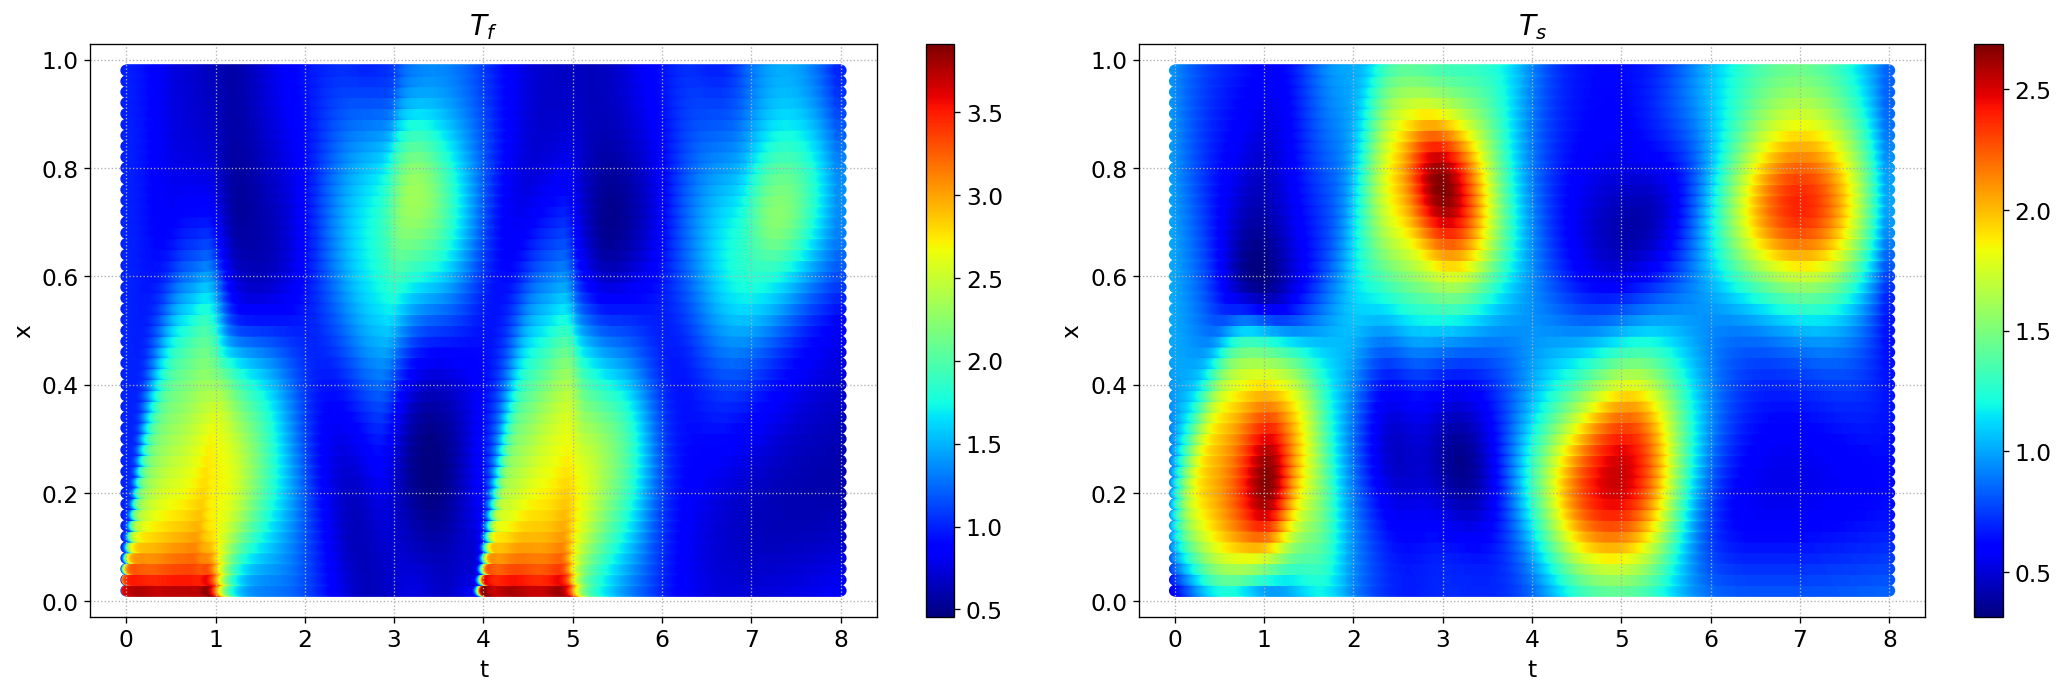

In [42]:
fig = pinn.plot(inputs, outputs)

In [35]:
fig.savefig('output.png')